# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

os.chdir("../")   # change directory to import a shared output directory and API Key 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "Weatherpy/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

baseURL = "https://api.openweathermap.org/data/2.5/weather?"  # base URL for weatherAPI
units = 'imperial'       # Units for displaying weather in fahrenheit

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

citiesToProcess = pd.DataFrame (cities, columns = ['City'])

#setup the remaining columns 
citiesToProcess["Lat"]="" 
citiesToProcess["Lng"]="" 
citiesToProcess["Max Temp"]="" 
citiesToProcess["Humidity"]="" 
citiesToProcess["Cloudiness"]="" 
citiesToProcess["Wind Speed"]="" 
citiesToProcess["Country"]="" 
citiesToProcess["Date"]="" 
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,,,,,,,,
1,hilo,,,,,,,,
2,punta arenas,,,,,,,,
3,mataura,,,,,,,,
4,strezhevoy,,,,,,,,


In [3]:
len(cities) # the length of expected items

604

In [4]:
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,,,,,,,,
1,hilo,,,,,,,,
2,punta arenas,,,,,,,,
3,mataura,,,,,,,,
4,strezhevoy,,,,,,,,


### Perform API Calls
Process cities that are betwen latitude and longitude range

In [5]:
 # setup parameters for passing to API to generate URL based on respective city passed into URL
baseURL = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"

parameters = {
      "units":units,
     "appid":weather_api_key,
}
group = 1
recordCount = 1

print (f"Beginning Data Retrieval ")
print (f"------------------------ ")
for index, row in citiesToProcess.iterrows():
    #print(index)
    if recordCount <= 50 :
        parameters['q'] = citiesToProcess.loc[index,'City']
    
        print (f"Processing Record {recordCount} of Set  {group} | {citiesToProcess.loc[index,'City']} ")
        getCityData = requests.get(baseURL,params=parameters).json()

        try:
            #grab infomration from results key 
            citiesToProcess.loc[index,'City']=getCityData['name']
            citiesToProcess.loc[index,'Lat']=getCityData['coord']['lat']
            citiesToProcess.loc[index,'Lng']=getCityData['coord']['lon']
            citiesToProcess.loc[index,'Max Temp']=getCityData['main']['temp_max']
            citiesToProcess.loc[index,'Humidity']=getCityData['main']['humidity']
            citiesToProcess.loc[index,'Cloudiness']=getCityData['clouds']['all']
            citiesToProcess.loc[index,'Wind Speed']=getCityData['wind']['speed']
            citiesToProcess.loc[index,'Country']=getCityData['sys']['country']
            citiesToProcess.loc[index,'Date']=getCityData['dt']
            
            recordCount +=1   # control count for the conditional 
            time.sleep(2)   # pause between number of records processed

        except (KeyError,IndexError):
            print("City not found. Skipping...")
    else:
        recordCount  = 1
        group += 1
        
            

    #Processing Record 1 of Set 1 | butaritari
    
print (f"------------------------ ")
print (f"Data Retrieval Complete ")
print (f"------------------------ ")
    


Beginning Data Retrieval 
------------------------ 
Processing Record 1 of Set  1 | illoqqortoormiut 
City not found. Skipping...
Processing Record 1 of Set  1 | hilo 
Processing Record 2 of Set  1 | punta arenas 
Processing Record 3 of Set  1 | mataura 
Processing Record 4 of Set  1 | strezhevoy 
Processing Record 5 of Set  1 | hermanus 
Processing Record 6 of Set  1 | havre-saint-pierre 
Processing Record 7 of Set  1 | castro 
Processing Record 8 of Set  1 | clyde river 
Processing Record 9 of Set  1 | xuddur 
Processing Record 10 of Set  1 | haines junction 
Processing Record 11 of Set  1 | piacabucu 
Processing Record 12 of Set  1 | vila velha 
Processing Record 13 of Set  1 | barrow 
Processing Record 14 of Set  1 | ushuaia 
Processing Record 15 of Set  1 | ribeira grande 
Processing Record 16 of Set  1 | jalu 
Processing Record 17 of Set  1 | rikitea 
Processing Record 18 of Set  1 | port lincoln 
Processing Record 19 of Set  1 | praia 
Processing Record 20 of Set  1 | bluff 
Pro

Processing Record 10 of Set  4 | hasaki 
Processing Record 11 of Set  4 | kuala lipis 
Processing Record 12 of Set  4 | kautokeino 
Processing Record 13 of Set  4 | okhotsk 
Processing Record 14 of Set  4 | sindou 
Processing Record 15 of Set  4 | bloomfield 
Processing Record 16 of Set  4 | vernon 
Processing Record 17 of Set  4 | faya 
Processing Record 18 of Set  4 | derzhavinsk 
Processing Record 19 of Set  4 | rtishchevo 
Processing Record 20 of Set  4 | coquimbo 
Processing Record 21 of Set  4 | kutum 
Processing Record 22 of Set  4 | vaitape 
Processing Record 23 of Set  4 | fairbanks 
Processing Record 24 of Set  4 | cidreira 
Processing Record 25 of Set  4 | marsh harbour 
Processing Record 26 of Set  4 | kailua 
Processing Record 27 of Set  4 | pisco 
Processing Record 28 of Set  4 | ruwi 
Processing Record 29 of Set  4 | kruisfontein 
Processing Record 30 of Set  4 | eresos 
Processing Record 31 of Set  4 | mandalgovi 
Processing Record 32 of Set  4 | vung tau 
Processing Re

Processing Record 28 of Set  7 | arman 
Processing Record 29 of Set  7 | cangzhou 
Processing Record 30 of Set  7 | port moresby 
Processing Record 31 of Set  7 | rincon 
Processing Record 32 of Set  7 | comodoro rivadavia 
Processing Record 33 of Set  7 | berezovyy 
Processing Record 34 of Set  7 | bulgan 
Processing Record 35 of Set  7 | kopong 
Processing Record 36 of Set  7 | xining 
Processing Record 37 of Set  7 | cottbus 
Processing Record 38 of Set  7 | tazmalt 
Processing Record 39 of Set  7 | bien hoa 
Processing Record 40 of Set  7 | suhut 
Processing Record 41 of Set  7 | xiantao 
Processing Record 42 of Set  7 | nokha 
Processing Record 43 of Set  7 | palauig 
Processing Record 44 of Set  7 | puerto narino 
Processing Record 45 of Set  7 | marcona 
City not found. Skipping...
Processing Record 45 of Set  7 | isangel 
Processing Record 46 of Set  7 | surman 
Processing Record 47 of Set  7 | grand-santi 
Processing Record 48 of Set  7 | khatanga 
Processing Record 49 of Set 

Processing Record 1 of Set  11 | aleksandrov gay 
Processing Record 2 of Set  11 | husavik 
Processing Record 3 of Set  11 | alice springs 
Processing Record 4 of Set  11 | ario 
City not found. Skipping...
Processing Record 4 of Set  11 | vila franca do campo 
Processing Record 5 of Set  11 | turinsk 
Processing Record 6 of Set  11 | north branch 
Processing Record 7 of Set  11 | waingapu 
Processing Record 8 of Set  11 | ghanzi 
Processing Record 9 of Set  11 | ballina 
Processing Record 10 of Set  11 | oranjestad 
Processing Record 11 of Set  11 | buzmeyin 
Processing Record 12 of Set  11 | reconquista 
Processing Record 13 of Set  11 | ushtobe 
Processing Record 14 of Set  11 | dharchula 
Processing Record 15 of Set  11 | hobyo 
Processing Record 16 of Set  11 | gallup 
Processing Record 17 of Set  11 | talara 
Processing Record 18 of Set  11 | kokstad 
Processing Record 19 of Set  11 | cagayan de tawi-tawi 
City not found. Skipping...
Processing Record 19 of Set  11 | cabedelo 
Pr

In [29]:
# Export to CSV 
citiesToProcess.to_csv(output_data_file)


In [30]:
# convert to a dataframe for future Processing
citiesDataDF=pd.DataFrame(citiesToProcess)
citiesDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,,
1,Hilo,19.7297,-155.0900,80.28,87.0,75.0,4.61,US,1660459715
2,Punta Arenas,-53.1500,-70.9167,32.11,93.0,75.0,8.05,CL,1660460379
3,Mataura,-46.1927,168.8643,50.49,88.0,3.0,4.16,NZ,1660460382
4,Strezhevoy,60.7333,77.5889,57.29,71.0,100.0,18.05,RU,1660460384


In [31]:
# convert columns to numeric datatype to gather statistics
#citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)
#citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
print(citiesDataDF.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object


In [32]:
citiesDataDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,18.977956,16.231853,69.825036,67.532727,54.387273,8.100364
std,33.466043,91.201966,14.519963,21.780278,41.466481,5.665127
min,-54.800000,-175.200000,29.250000,1.000000,0.000000,0.000000
25%,-9.038875,-67.421400,58.915000,51.250000,6.250000,3.780000
50%,22.547500,24.182150,71.885000,73.000000,61.000000,6.910000
75%,46.419325,99.251775,80.730000,84.000000,100.000000,11.435000
max,78.218600,179.316700,105.760000,100.000000,100.000000,30.310000


In [33]:
#  Get the indices of cities that have humidity over 100%.
hudmidityOver100 =citiesDataDF[(citiesDataDF['Humidity'] > 100)].index
print (hudmidityOver100)


Int64Index([], dtype='int64')


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data
clean_city_data = citiesDataDF.drop(hudmidityOver100, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,,
1,Hilo,19.7297,-155.0900,80.28,87.0,75.0,4.61,US,1660459715
2,Punta Arenas,-53.1500,-70.9167,32.11,93.0,75.0,8.05,CL,1660460379
3,Mataura,-46.1927,168.8643,50.49,88.0,3.0,4.16,NZ,1660460382
4,Strezhevoy,60.7333,77.5889,57.29,71.0,100.0,18.05,RU,1660460384


In [27]:
# Assign variable for plotting
lat = clean_city_data["Lat"]
lng = clean_city_data["Lng"]
MaxTemp= clean_city_data["Max Temp"]
Humidity = clean_city_data["Humidity"]
Cloudiness = clean_city_data["Cloudiness"]
WindSpeed = clean_city_data["Wind Speed"]


## Plotting the Data


## Latitude vs. Temperature Plot

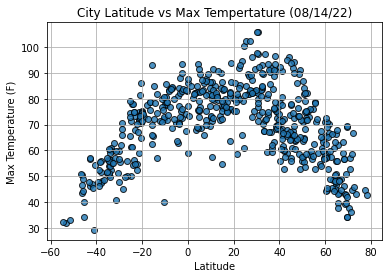

In [13]:
plt.scatter(lat, MaxTemp,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Max Tempertature (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_temp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

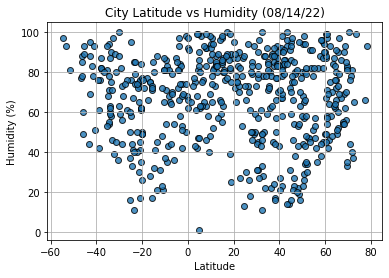

In [14]:
plt.scatter(lat, Humidity,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_humidity.png")

#show plot
plt.show()

This day it was observed that the humditity is high closer to the equatoer there does not appear to be any correction between
the latitude and the humditiy.  Looking at the latitude between -40 and 60  there are a lot of cities with humdidity near 100. 

## Latitude vs. Cloudiness Plot

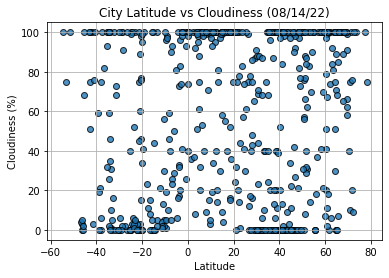

In [15]:
plt.scatter(lat, Cloudiness,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_cloudiness.png")

#show plot
plt.show()

There is no noticable relationship between latitude and cloudiness.  The data indidcates that the cloudiness can occur 
high or low at any latitude

## Latitude vs. Wind Speed Plot

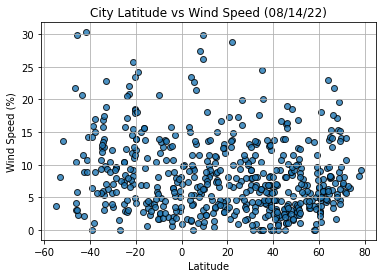

In [16]:
plt.scatter(lat, WindSpeed,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("Weatherpy/output_data/city_latitude_vs_windspeed.png")

#show plot
plt.show()

## Linear Regression

In [17]:
#create a function to create linear regession plots 
def plot_linear_regression(x_values, y_values,title, text_coordinates):
    #run regression 
    (slope, intercept,rvalue, pvalues,stderr) = linregress(x_values,y_values)
    regress_values=x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel (title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [18]:
#create northern and southern Hemisphere data fromes
northernHemiDF = clean_city_data.loc[(clean_city_data["Lat"]>=0)]
southernHemiDF = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.405143945286436


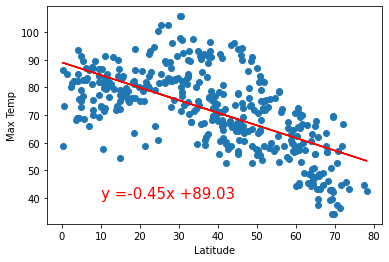

In [19]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(10,40))

The r-value of 0.45 indicates that there is a weak correlation bweteen max tempatures and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6693385345085797


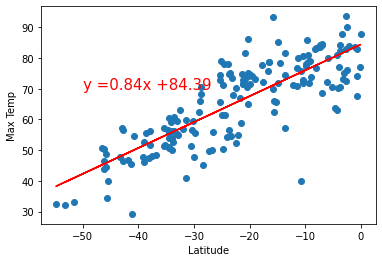

In [20]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-50,70))

The r-value of 0.58 indicates that there is a moderate correlation between the latitude and max tempatures in the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011630522904957597


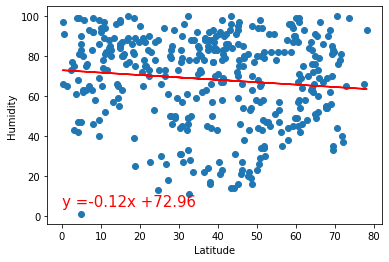

In [21]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(0,5))

The r-value of 0.009 indicates that there no correlation between latitude and humdity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0247145120855921


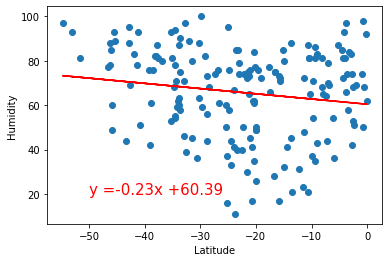

In [22]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(-50,20))

The r-value of 0.0015 indicates that there is also no correlation between latitude and humdity in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.000685569549389781


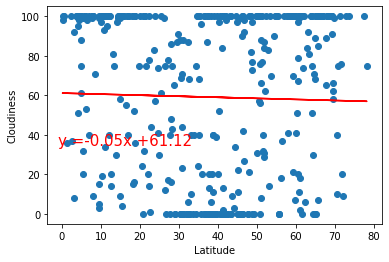

In [23]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-1,35))

The r-value of 0.002 indicates that there is no correlation between cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0014116718778017328


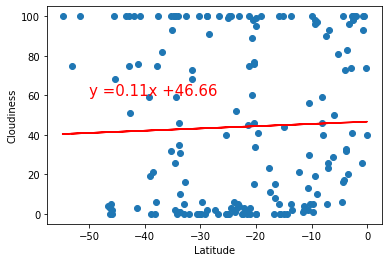

In [24]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-50,60))

The r-value of 0.02 indicates that there is a very weak correlation between Cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0037358024048167477


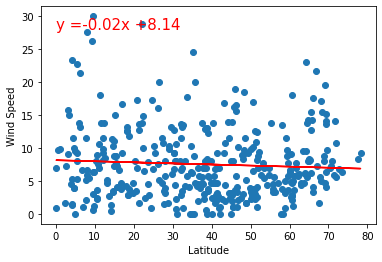

In [25]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(0,28))

The r-value of 0.006 indicates there is a very weak or no correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.044825440672690404


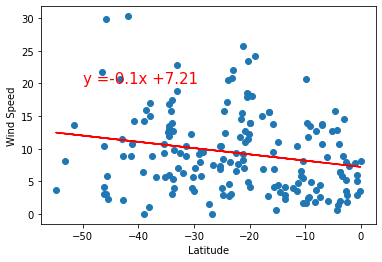

In [26]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,20))

The r-value of 0.10 indicates that there is none or very weak correlation between wind speed and latitude in the southern hemisphere